In [129]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('axes',titlesize=30)
plt.rc('axes',labelsize=30)
plt.rc('font',size=10)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('legend',fontsize= 15)
pd.set_option('display.max_row', 50000)
plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='retina'

In [130]:
import folium
import json
from folium import plugins
from folium.features import DivIcon

In [131]:
######## dataset 불러오기
df = pd.read_csv('야놀자!/통합_data/대전통합.csv',sep=',',encoding='cp949')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          308 non-null    object 
 1   score         308 non-null    float64
 2   loc           308 non-null    object 
 3   lowest_price  308 non-null    float64
 4   category      308 non-null    object 
 5   loc2          308 non-null    object 
 6   SIG_CD        308 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 17.0+ KB


In [133]:
print('대전 숙박업소 개수 : ', len(df))
print('대전 숙밥업소 모텔 개수 : ', (df['category']=='m').sum())
print('대전 숙밥업소 호텔 개수 : ', (df['category']=='h').sum())
print('대전 숙밥업소 팬션 개수 : ', (df['category']=='p').sum())
print('대전 숙밥업소 게스트하우스 개수 : ', (df['category']=='g').sum())

대전 숙박업소 개수 :  308
대전 숙밥업소 모텔 개수 :  271
대전 숙밥업소 호텔 개수 :  36
대전 숙밥업소 팬션 개수 :  0
대전 숙밥업소 게스트하우스 개수 :  1


In [134]:
total = len(df)
mtotal = (df['category']=='m').sum()
htotal = (df['category']=='h').sum()
gtotal = (df['category']=='g').sum()

In [135]:
### sort
dfc1 = df.sort_values(by=['category'])

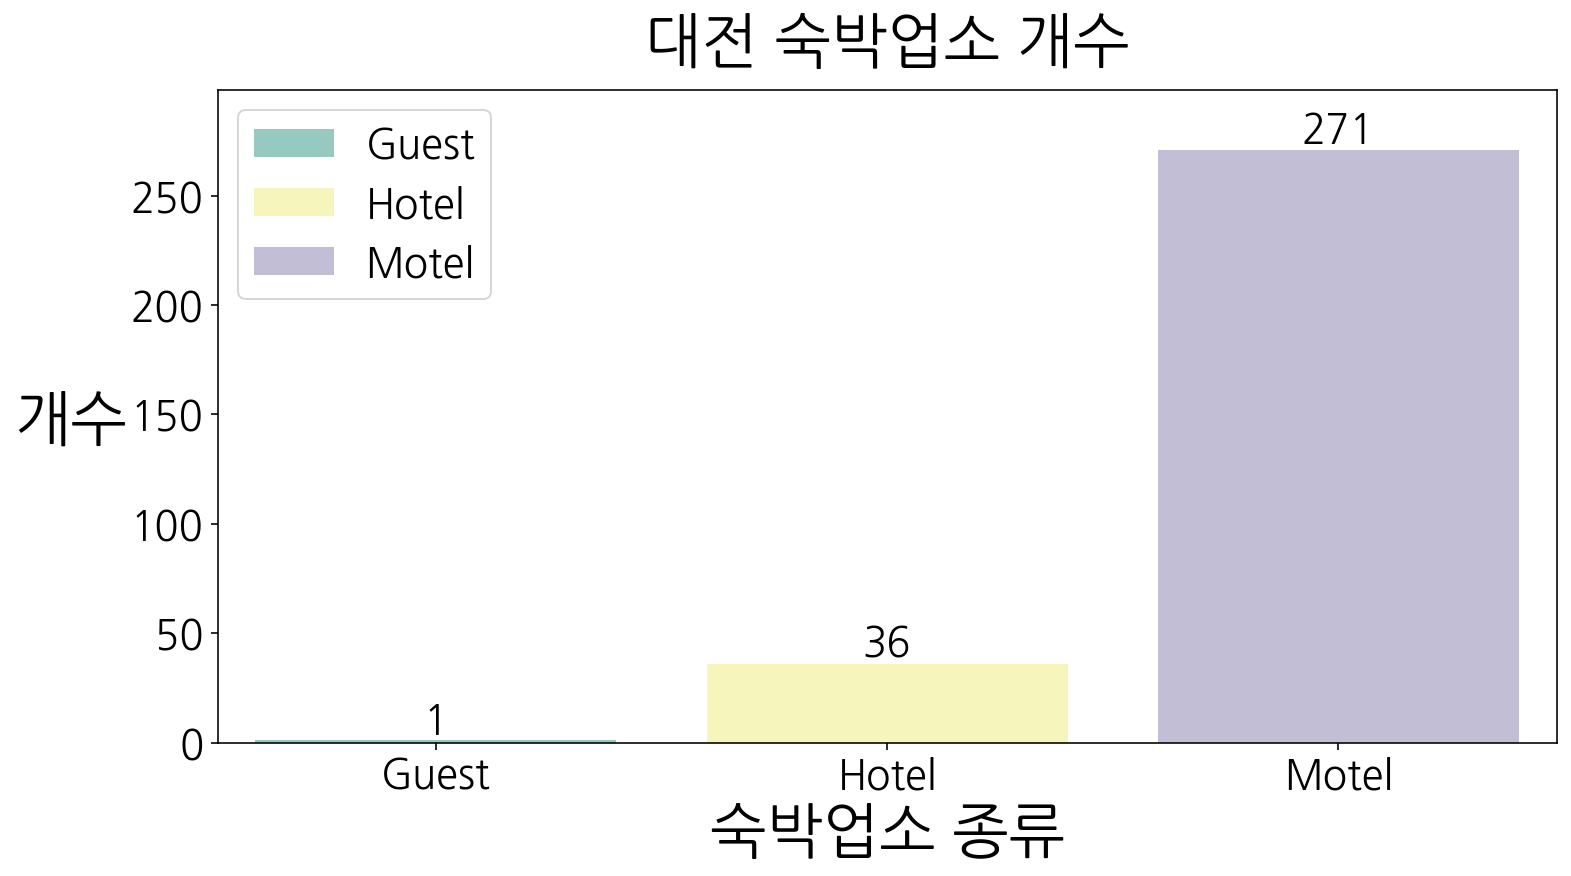

In [136]:
################### 대전 숙박업소 개수 그래프
ax = plt.figure(figsize=(12,6))
ax = sns.countplot(data = dfc1, x='category',hue = 'category',palette='Set3',dodge=False)
ax.set_title('대전 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('숙박업소 종류')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Guest','Hotel','Motel'])
ax.set_ylabel('개수',rotation=0,labelpad=30,position=(0,0.45,0))
plt.legend(labels=['Guest','Hotel','Motel'],fontsize=20)
plt.text(0,gtotal,gtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(1,htotal,htotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(2,mtotal,mtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.margins(0.03, 0.1)
#plt.show()
plt.savefig('대전 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

In [137]:
########### 지도 시각화용 dataset
df2=df.groupby(df['loc2']).mean()
df2.reset_index(level=['loc2'],inplace=True)
df_count=df.groupby('loc2').size()
df_count.reset_index(drop=True,inplace=True)
df2['count']=df_count
df2 = df2.sort_values(by='lowest_price',ascending=False)
df2.reset_index(drop=True,inplace=True)
df2['SIG_CD'] = df2['SIG_CD'].astype(str)

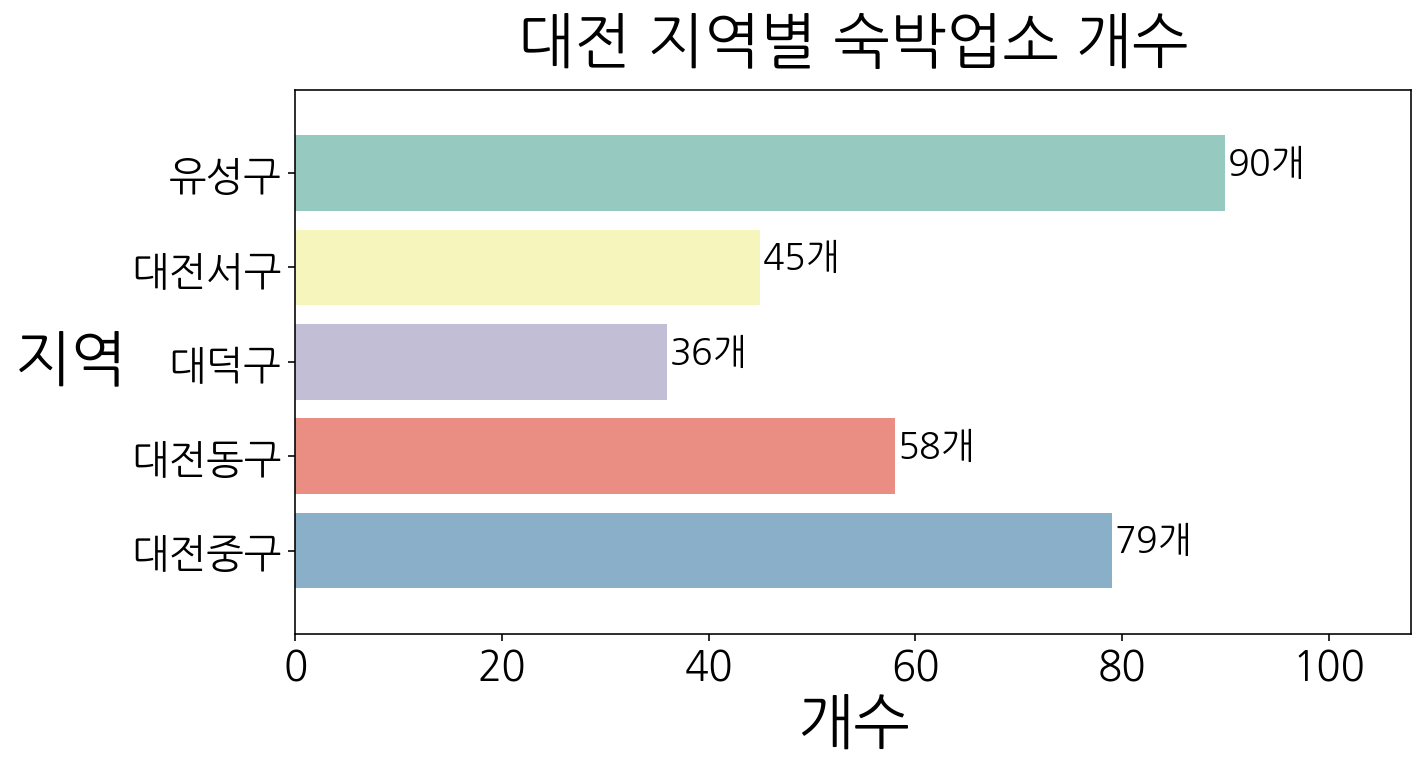

In [144]:
############## 대전 지역별 숙박업소 개수
ax = plt.figure(figsize=(10,5))
ax = sns.barplot(data = df2, x='count', y = 'loc2',palette='Set3')
ax.set_title('대전 지역별 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('개수')
ax.set_ylabel('지역',rotation=0,labelpad=30,position=(0,0.45,0))
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_width())}개', (p.get_width()+4,p.get_y()-0.3), ha='center', va='top', color='black', size=18)
plt.margins(0.2, 0.1)
#plt.show()
plt.savefig('대전 지역별 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

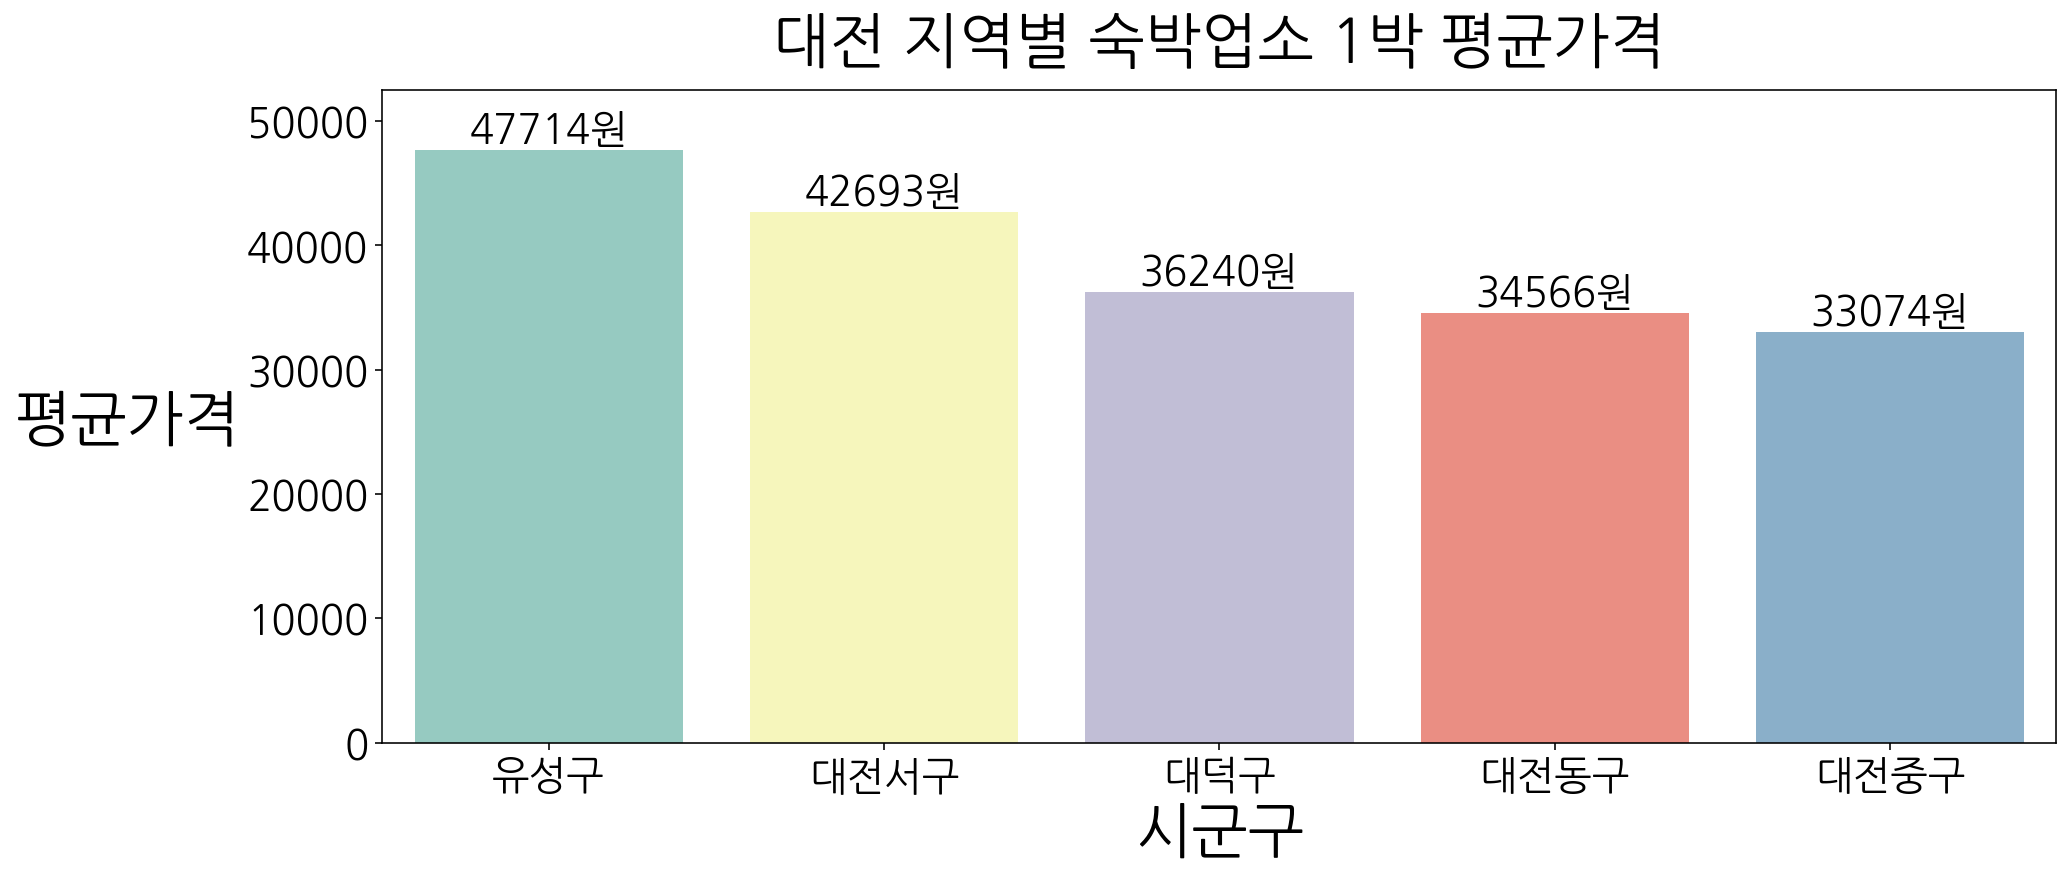

In [148]:
############## 대전 지역별 평균숙박업소 가격 그래프
########## 모든 업소의 최저가격을 가지고 추산한 것임으로 종합 가격 평균은 아님.
ax = plt.figure(figsize=(15,6))
ax = sns.barplot(data = df2, x='loc2', y = 'lowest_price',palette='Set3')
ax.set_title('대전 지역별 숙박업소 1박 평균가격',
            pad=15.0)
ax.set_xlabel('시군구')
ax.set_ylabel('평균가격',rotation=0,labelpad=60,position=(0,0.45,0))
for i in range(len(df2)):
    plt.text(i,round(df2.iloc[i][2]),str(round(df2.iloc[i][2]))+'원',fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.xticks(rotation=0)
plt.margins(0.02, 0.1)
#plt.show()
plt.savefig('대전 지역별 숙박업소 1박 평균가격.png',bbox_inches='tight', pad_inches=0.5) 

In [149]:
df2

,loc2,score,lowest_price,SIG_CD,count
0,유성구,4.422222,47714.022222,30200,90
1,대전서구,4.486667,42693.288889,30170,45
2,대덕구,4.441667,36239.777778,30230,36
3,대전동구,4.444828,34565.793103,30110,58
4,대전중구,4.368354,33073.822785,30140,79


In [150]:
m = folium.Map(location=[34.8, 128.0],zoom_start=8
            )
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','lowest_price'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='평균 가격').add_to(m)
folium.Marker([36.37799493741998, 127.33317039512865],tooltip = df2['loc2'][0]+' : '+str(int(df2['lowest_price'][0]))+'원').add_to(m)
folium.Marker([36.28832781519946, 127.35458954759874],tooltip = df2['loc2'][1]+' : '+str(int(df2['lowest_price'][1]))+'원').add_to(m)
folium.Marker([36.40801846383151, 127.43975278181972],tooltip = df2['loc2'][2]+' : '+str(int(df2['lowest_price'][2]))+'원').add_to(m)
folium.Marker([36.3239022912034, 127.47441321144538],tooltip = df2['loc2'][3]+' : '+str(int(df2['lowest_price'][3]))+'원').add_to(m) 
folium.Marker([36.29865926631303, 127.41204158816862],tooltip = df2['loc2'][4]+' : '+str(int(df2['lowest_price'][4]))+'원').add_to(m) 
m

In [151]:
m.save('대전 숙밥업소 1박 평균가격.html')

In [152]:
#### 시군구별 숙박업소 개수
m = folium.Map(location=[35.8, 127.6],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','count'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='숙박업소 개수').add_to(m)
folium.Marker([36.37799493741998, 127.33317039512865],tooltip = df2['loc2'][0]+' : '+str(int(df2['count'][0]))+'개').add_to(m)
folium.Marker([36.28832781519946, 127.35458954759874],tooltip = df2['loc2'][1]+' : '+str(int(df2['count'][1]))+'개').add_to(m)
folium.Marker([36.40801846383151, 127.43975278181972],tooltip = df2['loc2'][2]+' : '+str(int(df2['count'][2]))+'개').add_to(m)
folium.Marker([36.3239022912034, 127.47441321144538],tooltip = df2['loc2'][3]+' : '+str(int(df2['count'][3]))+'개').add_to(m) 
folium.Marker([36.29865926631303, 127.41204158816862],tooltip = df2['loc2'][4]+' : '+str(int(df2['count'][4]))+'개').add_to(m)

m
### 색상 https://dailyheumsi.tistory.com/m/144?category=854906

In [153]:
m.save('대전 숙밥업소 수.html')